In [18]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf 
# has a paarticular focus on training and inference of deep neural networks 
from tensorflow import keras 
# open source python library for developing and evaluating deep learinq models 
from tensorflow.keras import datasets 

In [2]:
mnist = tf.keras.datasets.mnist
# MNIST datasets is a built-in dataset provided by keras 
## training set consists of 60,000 images,while the test set has 10,000 images.

In [3]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [4]:
x_test.shape

(10000, 28, 28)

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_train = x_train/255
x_test = x_test/255
#Normalizing the matrix array of the number image of the value of pixel in images

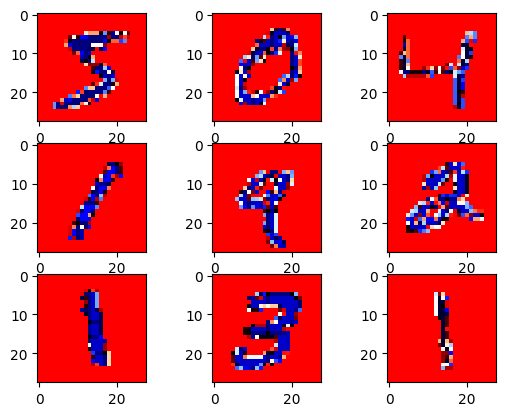

In [7]:
for i in range (9):
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i], cmap = 'flag')

In [8]:
print(x_train.shape)
print(x_train[0])

(60000, 28, 28)
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0

In [9]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)
#giving new shape to array

In [10]:
model = tf.keras.models.Sequential ([tf.keras.layers.Flatten(input_shape=(28,28)),
                               tf.keras.layers.Dense(128, activation ='relu'),
                               tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
 # convolutional Neural Netwark, also know as CNN or convNet
 # is a class of neural networks that specializes in processing data that has a grid-like topology, sch as an image.                               
                               
                        

model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss ='sparse_categorical_crossentropy',
            metrics = ['accuracy'])

In [14]:
model.compile(optimizer= tf.keras.optimizers.Adam(),
             loss ='sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [15]:
model.evaluate(x_test,y_test)



313/313 [==============================] - 1s 2ms/step - loss: 2.4354 - accuracy: 0.1002


[2.435382127761841, 0.10019999742507935]

In [16]:
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2639 - accuracy: 0.9248
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1148 - accuracy: 0.9662
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0796 - accuracy: 0.9760
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0592 - accuracy: 0.9814
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0459 - accuracy: 0.9861


In [19]:
y_pred = []
pred = model.predict(x_test)
for element in pred:
    y_pred.append(np.argmax(element))


313/313 [==============================] - 1s 2ms/step


In [21]:
y_pred = np.array(y_pred)
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [22]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[ 971,    0,    1,    1,    0,    2,    2,    2,    1,    0],
       [   0, 1123,    3,    1,    0,    1,    3,    0,    4,    0],
       [   5,    2, 1005,    6,    1,    0,    1,    7,    5,    0],
       [   0,    0,    2,  997,    0,    5,    0,    4,    1,    1],
       [   0,    0,    1,    0,  960,    0,    5,    5,    0,   11],
       [   2,    0,    0,   17,    2,  864,    3,    2,    2,    0],
       [   6,    3,    1,    2,    5,    3,  937,    0,    1,    0],
       [   2,    5,    7,    2,    3,    0,    0,  999,    2,    8],
       [   4,    0,    3,   22,    6,    7,    4,    2,  921,    5],
       [   3,    4,    0,   11,    8,    4,    0,    2,    1,  976]],
      dtype=int64)

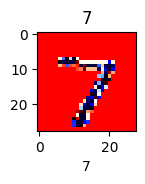

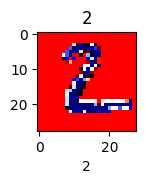

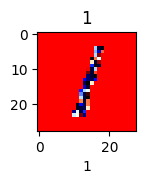

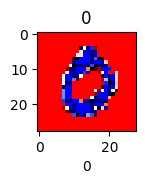

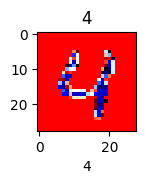

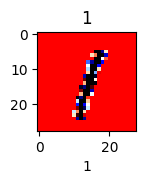

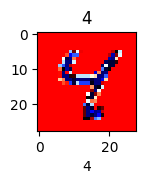

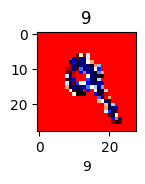

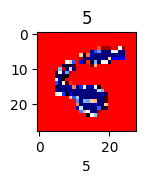

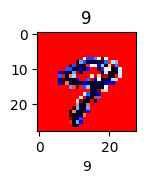

In [24]:
for i in range(0,10):
    plt.figure(figsize=(15,10))
    plt.subplot(1,10,i+1)
    plt.imshow(x_test[i],cmap='flag')
    plt.xlabel(y_pred[i])
    plt.title(y_test[i])

In [25]:
actual = y_test
predicted = y_pred
final = pd.DataFrame({'Actual' : actual, 'Predicted' : predicted})
final.head(20)

,Actual,Predicted
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,5
9,9,9


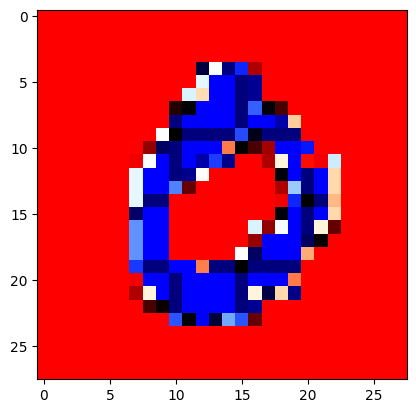

In [26]:
plt.imshow(x_test[3], cmap = 'flag')

In [27]:
prediction = model.predict(x_test)
print(np.argmax(prediction[3]))

313/313 [==============================] - 1s 2ms/step
0


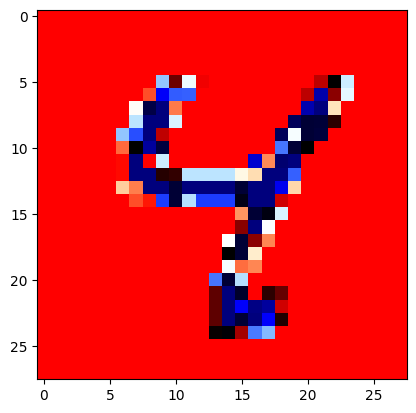

In [28]:
plt.imshow(x_test[6], cmap = 'flag')

In [29]:
prediction = model.predict(x_test)
print(np.argmax(prediction[6]))

313/313 [==============================] - 1s 2ms/step
4
